In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
sns.set_style("whitegrid")

In [16]:
loan_full = pd.read_csv("../data/loan_data.csv")

In [17]:
loan = loan_full.copy()

In [18]:
loan is loan_full

False

In [19]:
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [20]:
loan

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


<Axes: xlabel='int.rate', ylabel='Count'>

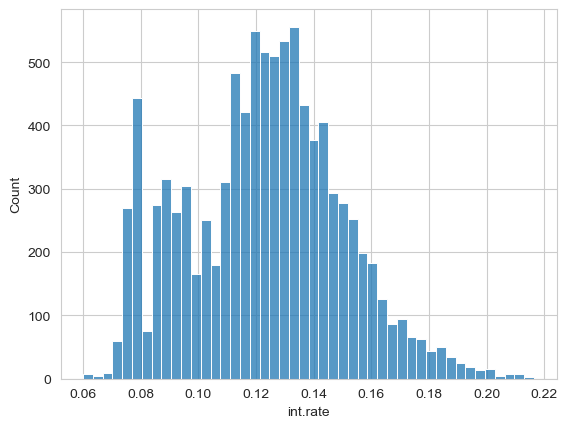

In [21]:
sns.histplot(data = loan["int.rate"])

In [22]:
dict_purpose = {}
for word in loan['purpose']:
    if word not in dict_purpose:
        dict_purpose[word] = 1
    else:
        dict_purpose[word] = dict_purpose[word] + 1

In [23]:
dict_purpose

{'debt_consolidation': 3957,
 'credit_card': 1262,
 'all_other': 2331,
 'home_improvement': 629,
 'small_business': 619,
 'major_purchase': 437,
 'educational': 343}

In [24]:
sum(dict_purpose.values())

9578

<Axes: >

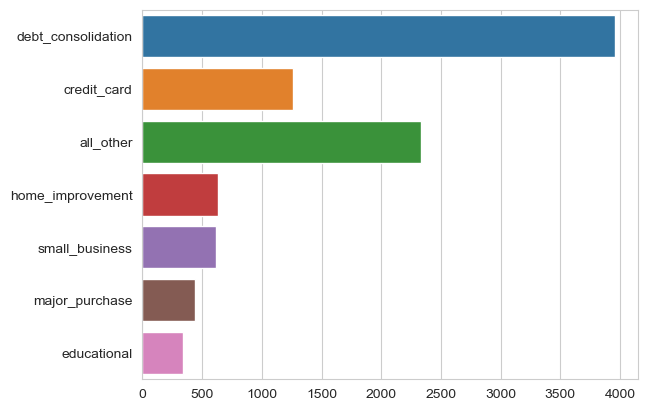

In [25]:
names = list(dict_purpose.keys())
values = list(dict_purpose.values())

sns.barplot(x = values, y = names)


In [26]:
names

['debt_consolidation',
 'credit_card',
 'all_other',
 'home_improvement',
 'small_business',
 'major_purchase',
 'educational']

<Axes: >

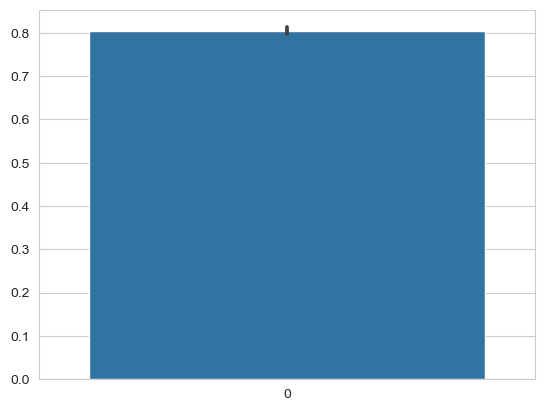

In [27]:
sns.barplot(data = loan['credit.policy'])

In [28]:
credit_policy_dict={}
for value in loan['credit.policy']:
    if value not in credit_policy_dict:
        credit_policy_dict[value] = 1
    else:
        credit_policy_dict[value] = credit_policy_dict[value] + 1

In [29]:
credit_policy_dict

{1: 7710, 0: 1868}

In [30]:
credit_policy_outcomes = list(credit_policy_dict.keys())
credit_policy_values = list(credit_policy_dict.values())

<Axes: >

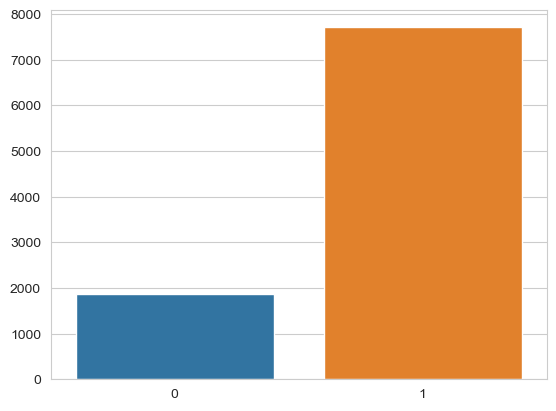

In [31]:
sns.barplot(x = credit_policy_outcomes, y = credit_policy_values)

Percentage of people who qualify for a loan (i.e. labeled 1)

In [32]:
credit_policy_dict[1]/(credit_policy_dict[0]+credit_policy_dict[1])

0.8049697222802256

In [33]:
loan.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [34]:
for word in loan.columns:
    print(type(loan[word][0]))

<class 'numpy.int64'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


In [35]:
loan_numeric = loan.drop(['purpose'], axis = 1)

In [36]:
loan_numeric

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [37]:
sns.pairplot(data = loan_numeric)

Error in callback <function flush_figures at 0x0000024CDE26EEE0> (for post_execute):


KeyboardInterrupt: 

<Axes: xlabel='dti', ylabel='fico'>

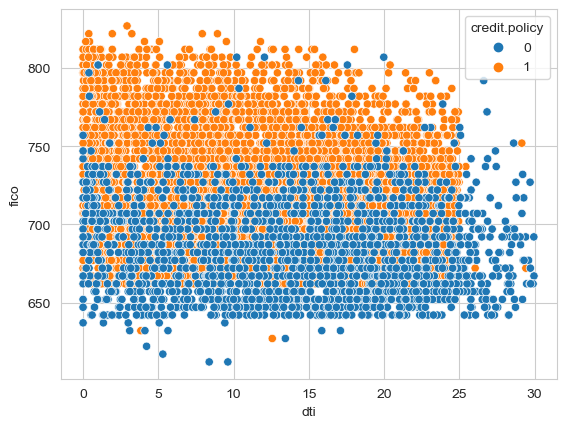

In [42]:
sns.scatterplot(x = loan['dti'], y = loan['fico'], hue = loan['credit.policy'])

In [39]:
loan

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


<Axes: xlabel='int.rate', ylabel='purpose'>

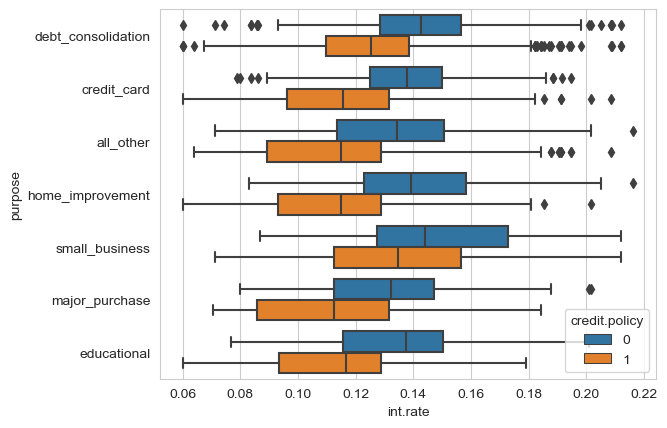

In [40]:
sns.boxplot(data = loan, x = 'int.rate', y = 'purpose', hue = 'credit.policy')

In [43]:
loan_0 = loan.loc[loan['credit.policy']==0]

In [68]:
loan_0.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,1868.0,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1.868000e+03,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000
mean,0.0,0.138680,294.367115,10.888520,13.877901,683.978051,4058.456304,2.977315e+04,52.934872,3.971092,0.248394,0.091006,0.277837
std,0.0,0.026032,211.256726,0.722315,7.727552,30.950970,2699.510897,6.680757e+04,29.008721,3.496608,0.783037,0.332597,0.448053
min,0.0,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.122200,138.867500,10.463103,7.757500,657.000000,2009.729167,2.469000e+03,29.775000,1.000000,0.000000,0.000000,0.000000
50%,0.0,0.138700,240.610000,10.896739,14.085000,682.000000,3690.000000,8.039500e+03,54.650000,4.000000,0.000000,0.000000,0.000000
75%,0.0,0.154500,392.840000,11.314475,19.945000,702.000000,5490.000000,2.327450e+04,77.800000,5.000000,0.000000,0.000000,1.000000
max,0.0,0.216400,940.140000,13.458836,29.960000,807.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [70]:
loan_1 = loan.loc[loan['credit.policy']==1]

In [71]:
loan_1.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,7710.0,7710.000000,7710.000000,7710.000000,7710.000000,7710.000000,7710.000000,7710.000000,7710.000000,7710.000000,7710.000000,7710.000000,7710.000000
mean,1.0,0.118754,325.079200,10.942680,12.298684,717.356031,4682.468461,13798.404280,45.312677,0.997536,0.143191,0.055123,0.131518
std,0.0,0.025571,205.611447,0.585371,6.627485,36.630697,2429.932117,16878.560424,28.821751,1.152580,0.469033,0.241491,0.337987
min,1.0,0.060000,15.690000,8.294050,0.000000,627.000000,1110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.097600,166.500000,10.596535,7.130000,687.000000,2970.010417,3334.250000,21.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.118900,278.605000,10.933107,12.380000,712.000000,4230.041667,8707.500000,44.300000,1.000000,0.000000,0.000000,0.000000
75%,1.0,0.135700,447.747500,11.289819,17.520000,742.000000,5789.958333,17579.750000,68.675000,2.000000,0.000000,0.000000,0.000000
max,1.0,0.212100,918.020000,14.528354,29.420000,827.000000,17616.000000,149527.000000,99.900000,8.000000,6.000000,4.000000,1.000000


<Axes: xlabel='log.annual.inc', ylabel='Count'>

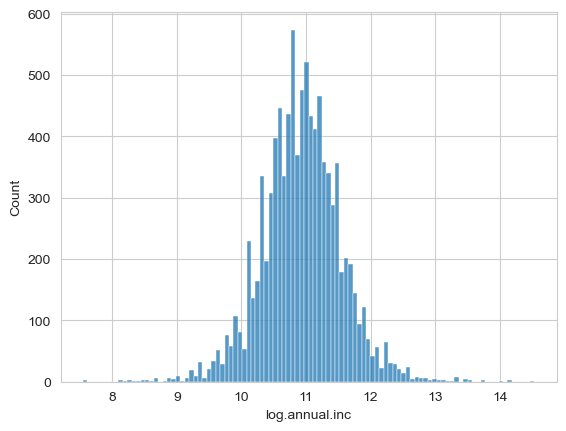

In [51]:
sns.histplot(loan['log.annual.inc'])

In [61]:
annual_inc = loan['log.annual.inc'].map(math.exp)

In [66]:
annual_inc.describe()

count    9.578000e+03
mean     6.840203e+04
std      6.122753e+04
min      1.896000e+03
25%      3.850000e+04
50%      5.576400e+04
75%      8.012100e+04
max      2.039784e+06
Name: log.annual.inc, dtype: float64

In [67]:
loan['log.annual.inc'].describe()

count    9578.000000
mean       10.932117
std         0.614813
min         7.547502
25%        10.558414
50%        10.928884
75%        11.291293
max        14.528354
Name: log.annual.inc, dtype: float64

<Axes: xlabel='log.annual.inc', ylabel='Count'>

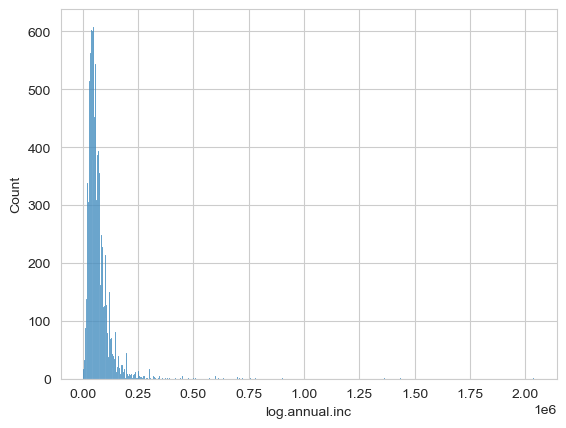

In [65]:
sns.histplot(loan['log.annual.inc'].map(math.exp))

Used Ln-transform to transform the data from right-skewed to become more symmetric.

<Axes: xlabel='log.annual.inc', ylabel='dti'>

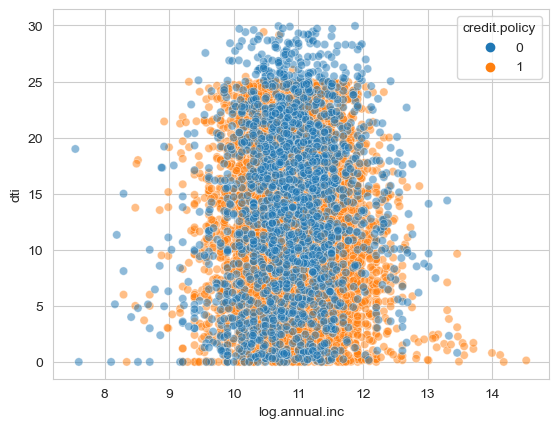

In [78]:
sns.scatterplot(data = loan, x = 'log.annual.inc', y = 'dti', hue = 'credit.policy', alpha = .5)

I am surprised there aren't more distinct regions (outside of dti >= 25). I would have expected much more solid orange region for dti <=5.

<Axes: xlabel='inq.last.6mths', ylabel='Count'>

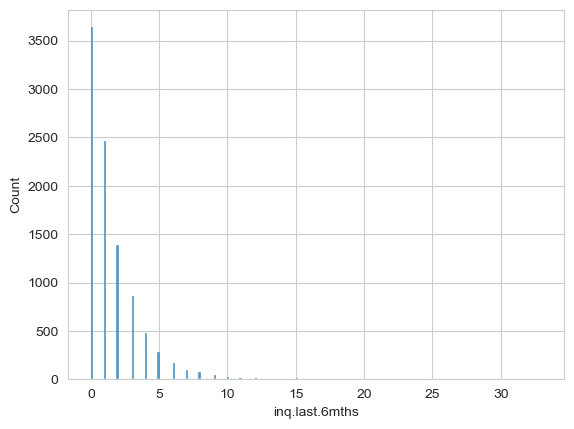

In [80]:
sns.histplot(loan['inq.last.6mths'])

In [89]:
sns.histplot(loan['inq.last.6mths'].apply(math.log))

ValueError: math domain error

In [100]:
add_01 = lambda x: math.log(x+2) - math.log(2)
loan_6mths = loan['inq.last.6mths'].apply(add_01)

In [101]:
loan_6mths

0       0.000000
1       0.000000
2       0.405465
3       0.405465
4       0.000000
          ...   
9573    0.693147
9574    1.252763
9575    1.609438
9576    1.252763
9577    1.386294
Name: inq.last.6mths, Length: 9578, dtype: float64

<Axes: xlabel='inq.last.6mths', ylabel='Count'>

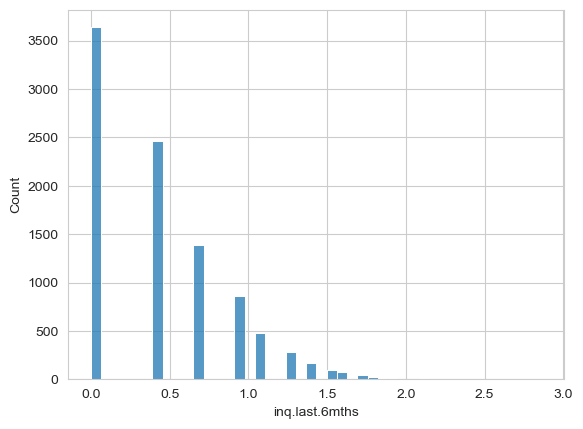

In [102]:
sns.histplot(data = loan_6mths)

<Axes: xlabel='fico', ylabel='Count'>

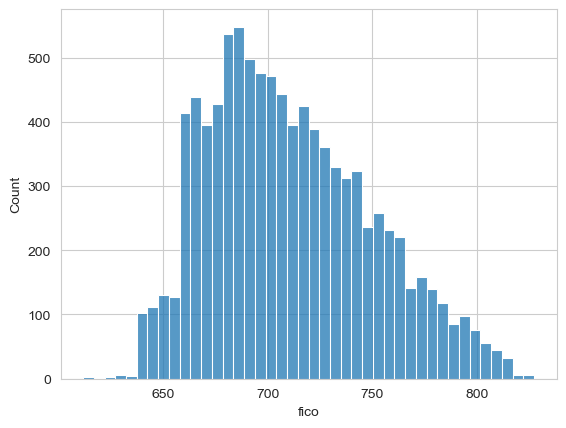

In [103]:
sns.histplot(data = loan['fico'])